In [35]:
import pylab as plt
import math
import numpy

%matplotlib inline


## ETAS to magnitude: A self-similar model

Invert the self-similar ETAS model to assign characteristic magnitude $m$ to each ETAS rate-density cell. 

First, the model. The temporal rate, for an entire earthquake is:

\begin{equation}
\dot{N} = \frac{1}{\tau \left(t_0 + t \right)^p} , 
\end{equation}

and of the spatial-linear density is,

\begin{equation}
N' = \frac{1}{\chi \left(r_0 + r \right)^q} .
\end{equation}

The spatial areal density, then, is (approximately) ... (note: we need to figure out if we should use $r_0$ or $L_r$)

\begin{equation}
N'' = \sigma = \frac{N'}{2 \pi r_0}
\end{equation}

Now, assume the general form, allowing for some normalization constants, 

\begin{equation}
\int{\dot{n}n'' dt dr \left( r \cdot d\theta \right)} = N_{GR}.
\end{equation}

We can write this a lot of different ways. The main point is that if we integrate the rate-density over time and area, we get the GR number, $N_{GR}$, and note that the radial integration is straight forward -- multiplying or dividing by $2 \pi r$, or $r \to r' = r+r_0$ (or something like that), and we might also consider an elliptical path length instead of a circle.

Just to get a handle on all of this, and recognize that the angular integration is simple, write it like:

\begin{equation}
\int{\dot{n} n' dt dr} = N_{GR} = N_{Omori} \int \frac{f_\tau}{N_{\tau}} \frac{f\chi}{N_{\chi}} dr dt,
\end{equation}

where $N_\chi$ and $N_\tau$ indicate the total number of earthquakes as calculated by integrating over the spatial and temporal domains, respectively, and both are equal to $N_{Omori}$. Putting this into the context of ETAS,

\begin{equation}
\dot{n}' = z_{etas} \cdot 2 \pi (r_0 + r) = N_{om} \frac{10^{(m_c + \Delta m - m)}}{ \tau \chi (t_0 + t)^p (r_0 +r)^q} ,
\end{equation}

or...

\begin{equation}
\dot{n}' = z_{etas} \cdot 2 \pi (r_0 + r) = \frac{1}{N_{om}} \frac{1}{ \tau (t_0 + t)^p \chi (r_0 +r)^q} ,
\end{equation}

and we model each lattice site as being a source at $r=0$ and $t=0$, so

\begin{equation}
z_{etas} = \frac{1}{2 \pi N_{om} \tau t_0^p \cdot \chi r_0^{(1+q)}}.
\end{equation}

Now, look back to \textit{Yoder et al. (2015)} to get the solution(s) for $\tau,~\chi,~t_0,$ and $r_0$ and then solve for $m$.




Starting with the spatial distribution, the number of earthquakes that fill a rupture surface is,

\begin{equation}
\log \left( N_{as} \right) = {\frac{2}{2+D}} \log \left( 1 + D/2 \right) + {\frac{D}{2+D}} \left( {m - \Delta m - m_c} \right), 
\end{equation}

\noindent where $ 1 < D < 2$ is the fractal dimenion of the rupture. The linear density over the rupture area is,

\begin{equation}
\left< N'_{max} \right> =  \left< \frac{dN}{dr} \right>_{max} = 2 \cdot \frac{N_{as}}{L_r}
\end{equation}

which leads to,

\begin{equation}
r_0 = \frac{N_{Omori}\left (q-1 \right)}{ \left< N'_{max} \right >}
\end{equation}


From the asymptotic constraint, we get

\begin{equation}
\chi = \frac{r_0^{1-q}}{N_{Omori} \left(q-1 \right)}
\end{equation}

Combining these, we get:

\begin{equation}
\chi r_0^{1+q} = \frac{r_0^2}{N_{Omori} \left(q - 1 \right)} = N_{Omori} \left( q-1 \right) \left( \frac{ L_r}{2 N_{as}} \right)^2
\end{equation}

A similar approach can be taken for the temporal component. (note: we need to revisit the temporal formulation. can we just sum up the $\Delta t$s, as we do for the spatial part, or do we need to factor in the area? i think a proper correction is, as we were going for originally, that the rate-density saturates; we cannot see two simultaneous earthquakes in the same space, so the maximum rate-density is rd_max ~ (1/dt)/area, ~ 10**(-3m/2))

Again, from Yoder et al. (2015), and also from Yoder et al. (2016),

\begin{equation}
t_0 = \frac{N_{Omori} \left( p-1 \right)}{\dot{N}_{max}} ,
\end{equation}

and from the asymptotic constraint,

\begin{equation}
N_\tau = N_{Omori} = \frac{t_0^{1-p}}{\tau \left( p-1 \right)} ,
\end{equation}

and 

\begin{equation}
\tau = \frac{t_0^{1-p}}{N_{Omori} \left( p-1 \right)} ,
\end{equation}

and from the near-field constraint,

\begin{equation}
\log \left( \dot{N}_{max} \right) = \frac{2}{3} \log \left( \frac{3}{2} \right) + \Delta \tau - \frac{m + 2\left( \Delta m_\tau + m_c \right) }{6}
\end{equation}

and so,

\begin{equation}
\tau \cdot t_0^p = \frac{1}{\dot{N}_{max}} = 10^{ \left( -\left[ \frac{2}{3}\log \left( \frac{3}{2} \right) + \Delta \tau - \left( \frac{m + 2\left( \Delta m_\tau + m_c \right) }{6} \right)  \right] \right)},
\end{equation}

noting that this formulation assumes $D_\tau = 1$, but it probably makes sense to consider $D_\tau \neq 1$, analogous to the spatial formulation. This can also be thought of in terms of aftershocks being triggered outside the immediate rupture area.

After some algebraic jumping jacks, we get to:

\begin{equation}
z_{etas} = \frac{2}{\pi \left( q-1 \right)} \cdot \frac{ N_{as}^2 \dot{N}_{max}}{N_{om}^2 L_r^2}
\end{equation}

and from here, we start consolidating our magnitudes and scaling constants. as a point of organization, let's to separate out the constants, m-terms, and mc-terms, so it's easy(ish) to follow. For reasons that become apparent once we get started, we hammer this out in logarithmic form:

%\begin{equation}
%\begin{split}
%\log(z_{etas}) = \log \left[ \frac{2}{\pi(q-1)} \right] + [ b(m-\Delta m - m_c) - \left( m - 2\Delta \lambda \right ) %]_{Omori,L_r}+ 
%\left[ 2 \cdot {\frac{2}{2+D}} \log \left( 1 + \frac{D}{2} \right) + 2 \cdot {\frac{D}{2+D}} \left( m - \Delta m - m_c %\right) \right]_{N_{as}} +
% \left[ \frac{2}{3} \log \left( \frac{3}{2} \right) + \Delta \tau - \frac{m}{6} - \frac{\Delta m_\tau + m_c}{3} %\right]_{\dot{N}} .
%\end{split}
%\end{equation}

\begin{equation}
\begin{split}
\log(z_{etas}) = \left [2b \left( m_c + \Delta m - m \right) \right] \\
+ \left[ \frac{2}{3}\log(\frac{3}{2}) + \Delta \tau - \frac{m}{6} - \frac{\Delta m_\tau + m+c}{3} \right] \\
+ \frac{4}{2+D} \log \left( 1 + D/2 \right) + \frac{2D}{2+D} \left(m-\Delta m - m_c \right)
+ \left( 2 \Delta \lambda - m \right) \\
+ \frac{4}{2 \pi (q-1)}
\end{split}
\end{equation}


Now, consolidating terms,

\begin{equation}
\begin{split}
\log(z_{etas}) = m \left[ -2b -7/6 + \frac{2D}{2+D} \right] \\
+ m_c \left[ 2b - \frac{2D}{2+D} - \frac{1}{3} \right] \\
+ \Delta m \left[ 2b + \frac{2D}{2+D} \right] \\
+ \left[ \log \left[ \frac{2}{\pi(q-1)} \right] + 2\Delta \lambda + \Delta \tau + \frac{4}{2+D} \log \left( 1 + \frac{D}{2} \right) + \frac{2}{3}\log \left( \frac{3}{2} \right) - \frac{\Delta m_\tau}{3}  \right]
\end{split}
\end{equation}

noting that 1) the last term, and effectively the $\Delta m$ term as well, is a collection of constants and 2) the term $\Delta m_\tau$ is included from Yoder et al. (2015) for posterity, but typically we assume $\Delta m_\tau = 0$. Also note that the "$b-1$" term might require futher assessment, as it (at some point during the analysis) assumes an Euclidian space, $D=2$, and so might be more accurately written something like "$b-D/2$".

Now, solving for $m$:

\begin{equation}
\begin{split}
m = \frac{1}{\left[ -2b -7/6 + \frac{2D}{2+D} \right]} \cdot \left( \log(z_{etas}) \\
- m_c \left[ 2b - \frac{2D}{2+D} - \frac{1}{3} \right] \\
- \Delta m \left[ 2b + \frac{2D}{2+D} \right] \\
- \left[ \log \left[ \frac{2}{\pi(q-1)} \right] + 2\Delta \lambda + \Delta \tau + \frac{4}{2+D} \log \left( 1 + \frac{D}{2} \right) + \frac{2}{3}\log \left( \frac{3}{2} \right) - \frac{\Delta m_\tau}{3}  \right]
\right)
\end{split}
\end{equation}





TODO: the previous formulation was corrected for a mistake in $(N_{as}/L_r)^2$ that probably needs to carry through to this analysis as well.
***
Which is all fine, but we get really small output magnitudes. it might make more sense to suggest that we specify $t_0$. As discussed in Yoder et al. (2015), from a certain perspective, $t_0$ is somewhat arbitrary, so long as $\tau$ is treated consistently. From this, going back a few steps, we get

\begin{equation}
\begin{split}
z_{etas} = -\log(t_0) + \left[ \log \left( \frac{p-1}{\pi(q-1)} \right) + \Delta \lambda + \frac{2}{2+D} \log \left( \frac{2+D}{2} \right) \right] + \\
+ m \left[ \frac{D}{2+D} + 2b - \frac{1}{2} \right] + \\
- \Delta m \left[ \frac{D}{2+D} + 2b \right] + \\
- m_c \left[ \frac{D}{2+D} + 2b \right]
\end{split}
\end{equation}

and solving for $m$ (more or less):

\begin{equation}
\begin{split}
m \left[ \frac{D}{2+D} + 2b - \frac{1}{2} \right] = 
z_{etas} + \log(t_0) + ... \\
+ \Delta m \left[ \frac{D}{2+D} + 2b \right] + ... \\
+ m_c \left[ \frac{D}{2+D} + 2b \right] + ... \\
 - \left[ \log \left( \frac{p-1}{\pi(q-1)} \right) + \Delta \lambda + \frac{2}{2+D} \log \left( \frac{2+D}{2} \right) \right]
\end{split}
\end{equation}

\noindent and we choose a $t_0$ that is compatible with our objectives (aka, 24 hour hazard, or something we're going to figure out later).

Now, code it up:

In [43]:
# q and p values are (relatively) well known. (we may also set these defaults in the
# functions themselves)
q = 1.5
p = 1.1
D = 1.5
dm0 = 1.0
dm_tau0=0.
d_lambda = 1.76
d_tau = 2.3      # 2.28 < d_tau < 2.57, variable primarily (?) with depth.
#
class ETAS_src(object):
    # Class to describe ETAS sources -- like earthquakes, but more general. 
    # at least at first, the idea will be to use this to solve for m based on z_etas
    # and constants.
    def __init__(self, z_etas, mc, b=1.0, D=1.5, dm=1.0, q=1.5, p=1.1, d_lambda=d_lambda, d_tau=d_tau, dm_tau=0):
        self.__dict__.update(locals())
        #
        #const = numpy.log(numpy.pi*(q-1)) - d_lambda - d_tau - (2/(2+D))*numpy.log(1+D/2) + (2/3)*numpy.log(3/2) - dm_tau/3
        const = numpy.log10(2./(numpy.pi*(q-1))) + 2*d_lambda + d_tau + (4./(2.+D))*numpy.log10(1.+D/2.) + (2./3.)*numpy.log10(1.5) - (dm_tau/3.)
        
        self.mag = (numpy.log(z_etas) + mc*(b+(2*D/(2+D))+(1./3)) + dm*(b + (2*D/(2+D))) - const)/(b-(5./6.)+(2*D/(2+D)))
#
# note: this function is cut-pated from globalETAS.py (where it is cut-pased from the main code, but
#        for the purposes of modularizing and compiling it). so this is pretty sloppy work, and we really need to
#        submodule globalETAS into this project, but for now... this is how globalETAS calculates ETAS parameters:
def get_eq_properties(m=None, mc=None, b=1.0, d_lambda=1.76, d_tau=2.3, D=1.5, dm=1.0, p=1.1, q=1.5, dm_tau=0):
	#mag = rw['mag']
	r_vals = locals().copy()
	#
	# bridging some new and old syntax:
	mag=m
	dmstar=dm
	l_15_factor = (2./3.)*numpy.log10(1.5)
	#
	L_r = 10.0**(.5*mag - d_lambda)
	dt_r = 10.0**(.5*mag - d_tau)		# approximate duration of rupture
	lN_om = b*(mag - dmstar - mc)
	N_om = 10.0**lN_om
	#
	# self-similar formulation from yoder et al. 2014/15:
	# start with the (log of the) number of earthquakes/aftershocks in the rupture area:
	# (in yoder et al. 2015, this is "N_as", or "number of aftershocks (inside rupture area)".
	#
	lN_chi = (2.0/(2.0 + D))*numpy.log10(1.0 + D/2.) + D*(mag - dmstar - mc)/(2.+D)
	N_chi  = 10.**lN_chi
	#
	# mean linear density and spatial Omori parameters:
	linear_density = 2.0*N_chi/L_r		# (linear density over rupture area, or equivalently the maximum spatial (linear) density of aftershocks.
	#
	## this version is in use with BASScast:
	# ... and these appear to result in different initial rate-densities, though the maps are qualitatively similar beyond that.
	# not sure at this point which version was actually published.
	#l_r0 = mag*((6.0+D)/(4.0+2*D)) - (2.0/(2.0+D))*(dmstar+ + mc - math.log10((2.0+D)/2.0)) + math.log10(q-1.0) - d_lambda - math.log10(2.0)
	# r_0 = 10.**l_r0
	#
	# from yoder et al. 2015 and sort of from BASScast:
	r_0 = N_om*(q-1.0)/linear_density		
	#
	## let's try this formulation; sort out details later.
	#lr_0 = mag*((6.0+D)/(4.0+2*D)) - (2.0/(2.0+D))*(dmstar + mc - math.log10((2.0+D)/2.0)) + math.log10(q-1.0) - d_lambda - math.log10(2.0)
	#r_0 = 10.**lr_0
	#
	chi = (r_0**(1.-q))/(N_om*(q-1.0))
	#radialDens = (q-1.0)*(r0ssim**(q-1.0))*(r0ssim + rprime)**(-q)
	#
	# temporal Omori parameters:
	# (something is not correct here; getting negative rate_max (i think))
	# ... but isn't this supposed to be the exponent (log)?
	rate_max = 10.**(l_15_factor + d_tau - mag/6. - (dm_tau + mc)/3.)
	t_0 = N_om*(p-1.)/rate_max		# note, however, that we can really use just about any value for t_0, so long as we are consistent with tau.
	# something is wrong with this tau calc; we're getting t_0<0. needs fixin...
	tau = (t_0**(1.-p))/(N_om*(p-1.))
	#
	r_vals.update({'tau':tau, 'chi':chi, 't_0':t_0, 'r_0':r_0})
	#
	# initial etas rate density:
	# (1/N_om)*omori_rate*omori_density
	z0=(10**(dm+mc-m))*1./(tau*(t_0**p)*chi*(r_0**(q+1))*2*numpy.pi)
	r_vals.update({'z0':z0})
	
	return r_vals

# note: code this up as a class object; set up these functions as @property s
def N_dot_max(m,mc, d_tau=d_tau, dm_tau=dm_tau0):
    return 10**((2./3.)*numpy.log10(1.5) + d_tau - (m + 2*(dm_tau + mc))/6.)
#
# can we use this to invert current rates to an "initial" rate, based on a model source event?
def omori_rate_2(t,n_dot0,t0,p):
    return n_dot0*(t0/(t0+t))**p

#def omori_rate_0_log(t, m,mc, p=1.1, b=1.0, dm=1.0):
#    # get t0 from self-similarity.
#    # t0 = N_om (p-1)/N_dot_max
    
def t0_log(m,mc,dm=1.0,b=1.0,p=1.1):
    return numpy.log(p-1) + b*(m-dm-mc) - numpy.log(N_dot_max(m,mc))
    
#
def N_Omori(m, mc, dm=dm0):
    return 10**(m-dm-mc)
#
def L_r(m, d_lambda=d_lambda):
    return 10**(.5*m - d_lambda)
#
def N_as(m,mc,dm=dm0,D=D):
    return 10**((2.(2+D))*numpy.log(1+D/2) + (2*D/(2+D))*((m-dm-mc)/2))

def N_prime_max(m,mc,dm=dm0,D=D, d_lambda=d_lambda):
    return 2.*N_as(m,mc,dm=dm0,D=D)/L_r(m,d_lambda)

def r0(m,mc,dm=dm0,D=D,q=q):
    return N_Omori(m=m,mc=mc,dm=dm)*(q-1)*L_r(m)/(2.*N_as(m=m,mc=mc,dm=dm,D=D))

def z_to_m(z,mc,dm=dm0,D=D):
    # we probably need to do some more algebra. for now, we'll do this procedurally and
    # numerically.
    #
    return None

In [85]:
# write up a quick etas z-m test script.
    
def etas_m_to_z(m=7.0, mc=2.5, delta_t=0, delta_r=0, b=1.0, D=1.5, dm=1.0, q=1.5, p=1.1, d_lambda=1.76, d_tau=2.3, dm_tau=0):
    N_om = 10**(b*(m-dm-mc))
    t0 = 10**(t0_log(m,mc))
    tau = (t0**(1.-p))/(N_om*(p-1))
    L_r = 10**(.5*m-d_lambda)
    N_as = 10**((2./(2+D))*numpy.log10(1+.5*D) + (D/(2+D))*(m-dm-mc))
    spatial_intensity_factor=1.0   # this is used in rotational, as opposed to equal-area, transformations.
    
    #
    r0  = N_om*(q-1.)*L_r/(2*N_as)
    chi = (r0**(1-q))/(N_om*(q-1))
    #
    #delta_t=0.
    #delta_r=0.
    #
    # local intensity for an earthquake, some distance r:
    orate = 1./(tau * (t0 + delta_t)**p)
    radial_density = (q-1.0)*(r0**(q-1.0))*((r0 + delta_r)**(-q))
    circumf = 2.*math.pi*(r0 + delta_r)
    #
    spatialdensity = spatial_intensity_factor*radial_density/circumf
    #
    z_etas = spatialdensity*orate
    #
    #print("m: %f, log(z): %f" % (m, numpy.log(z_etas)))
    #
    return z_etas

def etas_rate_density_to_mag(z_etas_log, mc, D=1.5, b=1.0, dm_bath=1.0, dm_tau=0., d_lambda=1.76, d_tau=2.3, p=1.1, q=1.5):
    #D2 = (2*D/(2+D))
    D2 = -(2*D/(2+D))  # this gets us really close...
    
    #return (1./(-2*b-(7./6.)+(2*D/(2+D))))*(z_etas_log -  
    #                                        mc*(2*b - (2*D/(2+D)) - (1./3)) - 
    #                                        dm_bath*(2*b - (2*D/(2+D))) - 
    #                                        (numpy.log10(2./(numpy.pi*(q-1))) + 2*d_lambda + d_tau + 
    #                                         (4./(2.+D))*numpy.log10(1.+D/2.) + (2./3.)*numpy.log10(1.5) - (dm_tau/3.)) )
    return (1./(-2*b-(7./6.)+D2))*(z_etas_log -  
                                            mc*(2*b - D2 - (1./3)) - 
                                            dm_bath*(2*b - D2) - 
                                            (numpy.log10(2./(numpy.pi*(q-1))) + 2*d_lambda + d_tau + 
                                             (2*D2)*numpy.log10(1.+D/2.) + (2./3.)*numpy.log10(1.5) - (dm_tau/3.)) )


def etas_mz_test(m=7.0, mc=2.5, b=1.0, D=1.5, dm=1.0, q=1.5, p=1.1, d_lambda=1.76, d_tau=2.3, dm_tau=0):
    # based on BASScast, for m=7, mc=2.5, we should get z=5.5532409997696e-08 when we use the r0ssim
    # r0 value; we get something lin 10**-12 with the r0, which i think is the same way we calc. r0 in
    # GlobalETAS.
    # though there might be some minor differences in how some of those numbers are calculated.
    #
    eq_params = get_eq_properties(m,mc)
    #z = etas_m_to_z(m,mc)   # defaults should be the same...
    z = eq_params['z0']
    m = etas_rate_density_to_mag(numpy.log(z),mc)
    #
    print('z, log(z), m: ', z,numpy.log10(z),m)

z=etas_mz_test(7., 2.5)    

z, log(z), m:  2.08959471541e-07 -6.67993793874 7.49872966015


Now, can we "correct" the current rate to magnitude by correcting the observed rate to the immediately post-event rate, based pm the mainshock? that would look like:

\begin{equation}
{rate\_ratio} = \left( 1 + \frac{t}{t_{0,mainshock}} \right)^p
\end{equation}

and going back thour the earlier defintions,

\begin{equation}
{rate\_ratio} = \left( 1 + \frac{\dot{N_{max}}}{N_{Omori}(p-1)} \right) ^p
\end{equation}

...and

\begin{equation}
{rate\_ratio} = \left (1 + t \cdot \frac{10^{-7m/6 - \Delta m - 4m_c/3 + \Delta tau + \frac{2}{3}\log(\frac{3}{2})}}{p-1} \right )^p
\end{equation}



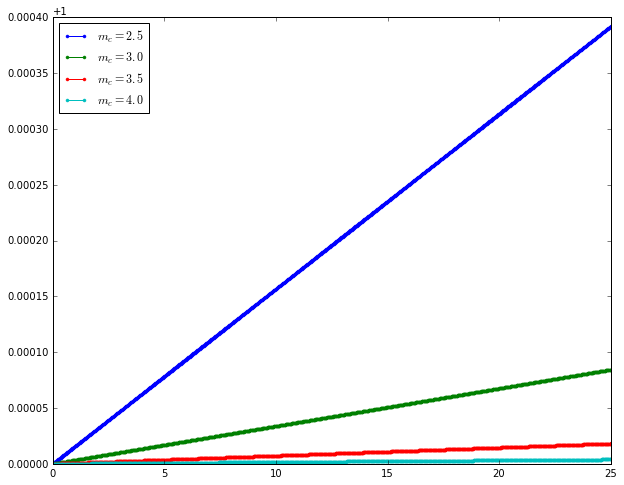

In [42]:
def rate_ratio(t,m,mc,dm=1.0, d_tau=2.3, p=1.1):
    return (1. + (t/(p-1.))*10**(-m*7/6 - dm - 4*mc/3 + d_tau + .66666*numpy.log10(1.5)))**p

plt.figure(figsize=(10,8))
plt.clf()
m=7.6
#ts = numpy.arange(0., 10.*3600.*24, 3600)
ts = numpy.linspace(0., 25, 1000)
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xscale('log')
for mc in [2.5,3.0,3.5,4.0]:
    ax.plot(ts, [rate_ratio(t*3600.*24,m,mc) for t in ts], '.-', label='$m_c={}$'.format(mc))
plt.legend(loc=0)